In [ ]:
from google.colab import files
uploaded = files.upload()

Saving admission_predict.csv to admission_predict.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import io
df_admission = pd.read_csv(io.BytesIO(uploaded['admission_predict.csv']))

# Data Exploration

In [ ]:
df_admission.shape

(500, 9)

In [ ]:
df_admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df_admission.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [ ]:
df_admission.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df_admission.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [ ]:
df_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# Data Cleaning

In [ ]:
# As we know Serial no is not important, so we cab drop this variable
df_admission.drop(['Serial No.'], axis=1, inplace=True)

In [ ]:
for col in df_admission.columns:
  vc = df_admission[col].value_counts()
  print(vc)

312    24
324    23
316    18
321    17
322    17
327    17
314    16
311    16
320    16
317    15
325    15
315    13
308    13
323    13
318    12
319    12
326    12
304    12
300    12
313    12
310    11
305    11
301    11
329    10
307    10
299    10
298    10
309     9
340     9
331     9
328     9
330     8
332     8
334     8
306     7
302     7
297     6
296     5
303     5
336     5
295     5
335     4
333     4
338     4
339     3
337     2
294     2
290     2
293     1
Name: GRE Score, dtype: int64
110    44
105    37
104    29
112    28
107    28
106    28
103    25
102    24
100    24
99     23
111    20
101    20
113    19
109    19
108    19
114    18
116    16
115    11
119    10
98     10
118    10
120     9
117     8
97      7
96      6
95      3
94      2
93      2
92      1
Name: TOEFL Score, dtype: int64
3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5  

In [ ]:
df_admission['lor'] = df_admission.iloc[:,4]
df_admission['Probability'] = df_admission.iloc[:,7]

In [ ]:
df_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
 8   lor                500 non-null    float64
 9   Probability        500 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 39.2 KB


In [ ]:
df_admission.drop([df_admission.columns[4]], axis=1, inplace=True)
df_admission.drop([df_admission.columns[6]], axis=1, inplace=True)

In [ ]:
df_admission.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
CGPA                 False
Research             False
lor                  False
Probability          False
dtype: bool

# Exploratory Data Analysis

Text(0.5, 0, 'GRE Score')

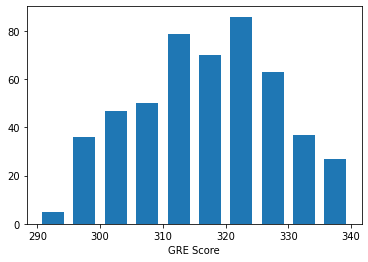

In [ ]:
# Data distribution for GRE
plt.hist(df_admission['GRE Score'], rwidth=0.7)
plt.xlabel('GRE Score')

Text(0.5, 0, 'TOEFL Score')

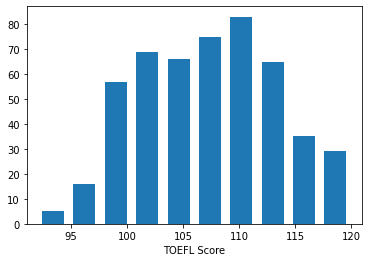

In [ ]:
# Data distribution for TOEFL Score
plt.hist(df_admission['TOEFL Score'], rwidth=0.7)
plt.xlabel('TOEFL Score')

Text(0.5, 0, 'University Rating')

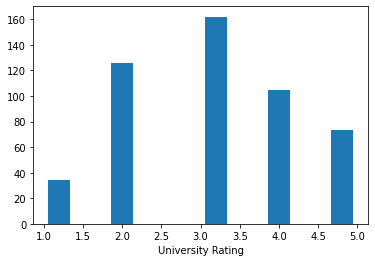

In [ ]:
# Data distribution for University Rating
plt.hist(df_admission['University Rating'], rwidth=0.7)
plt.xlabel('University Rating')

Text(0.5, 0, 'SOP')

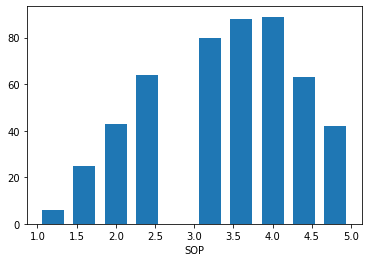

In [ ]:
# Data distribution for SOP
plt.hist(df_admission['SOP'], rwidth=0.7)
plt.xlabel('SOP')

(array([220.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 280.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

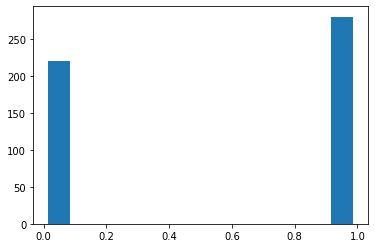

In [ ]:
# Data distribution for Research
plt.hist(df_admission['Research'], rwidth=0.7)

Text(0.5, 0, 'LOR')

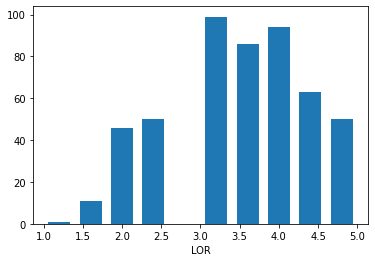

In [ ]:
# Data distribution for LOR
plt.hist(df_admission['lor'], rwidth=0.7)
plt.xlabel('LOR')

Text(0.5, 0, 'Probability')

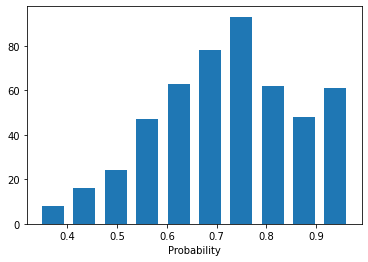

In [ ]:
# Data distribution for Probability
plt.hist(df_admission['Probability'], rwidth=0.7)
plt.xlabel('Probability')

# Data Preprocessing

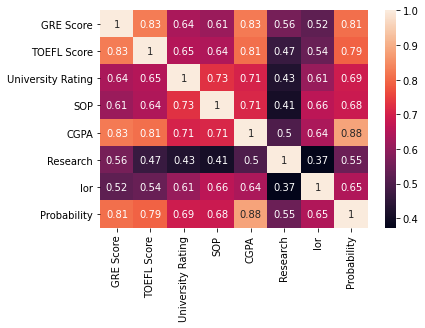

In [ ]:
# Correlation checking
corr = df_admission.corr()
sns.heatmap(data = corr, annot=True)

In [ ]:
# Splitting the dataset in features and label

x = df_admission.drop(['Probability'], axis=1)
y = df_admission['Probability']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

# Model Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
model_lr = LinearRegression(normalize=True);
model_DT = DecisionTreeRegressor();
model_RF = RandomForestRegressor();
model_svm = SVR();
model_knn = KNeighborsRegressor();

In [ ]:
# Fit the model
model_lr.fit(x_train, y_train);
model_DT.fit(x_train, y_train);
model_RF.fit(x_train, y_train);
model_svm.fit(x_train, y_train);
model_knn.fit(x_train, y_train);

In [ ]:
# Prediction result
y_pred_lr = model_lr.predict(x_test);
y_pred_DT = model_DT.predict(x_test);
y_pred_RF = model_RF.predict(x_test);
y_pred_SVM = model_svm.predict(x_test);
y_pred_KNN = model_knn.predict(x_test);

In [ ]:
# Linear Regression: Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test,y_pred_lr)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test,y_pred_lr)))
print("Root Mean squared Error: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_lr))))

Mean Absolute Error: 0.0453477110428628
Mean Squared Error: 0.0038128490869800548
Root Mean squared Error: 0.06174827193517285


In [ ]:
# Decision Tree: Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test,y_pred_DT)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test,y_pred_DT)))
print("Root Mean squared Error: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_DT))))

Mean Absolute Error: 0.060799999999999986
Mean Squared Error: 0.006996
Root Mean squared Error: 0.08364209466530594


In [ ]:
# Random Forest: Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test,y_pred_RF)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test,y_pred_RF)))
print("Root Mean squared Error: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_RF))))

Mean Absolute Error: 0.04603466666666661
Mean Squared Error: 0.004455915999999995
Root Mean squared Error: 0.06675264788755571


In [ ]:
# SVM: Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test,y_pred_SVM)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test,y_pred_SVM)))
print("Root Mean squared Error: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_SVM))))

Mean Absolute Error: 0.06108062114825332
Mean Squared Error: 0.006394380749930767
Root Mean squared Error: 0.07996487197470378


In [ ]:
# KNN: Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test,y_pred_KNN)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test,y_pred_KNN)))
print("Root Mean squared Error: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_KNN))))

Mean Absolute Error: 0.05176000000000001
Mean Squared Error: 0.00527328
Root Mean squared Error: 0.07261735329795489


*Since Linear Model gives better rather than other two so now we will boost the model performance by applying AdaBoost algorithm.*

*Now check the model through OLS(Ordinal Least Square Method) to cross check our Linear Model results*

In [ ]:
import statsmodels.api as sm
model_sm = sm.OLS(y_train,x_train).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Probability   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              5726.
Date:                Wed, 29 Jul 2020   Prob (F-statistic):                        0.00
Time:                        16:17:07   Log-Likelihood:                          442.49
No. Observations:                 350   AIC:                                     -871.0
Df Residuals:                     343   BIC:                                     -844.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score            -0.0032      0.000     -7.493      0.000      -0.004      -0.002
TOEFL Score           0.0033      0.001      2.745      0.006       0.001       0.006
University Rating     0.0171      0.005      3.356      0.001       0.007       0.027
SOP                   0.0070      0.006      1.148      0.252      -0.005       0.019
CGPA                  0.1410      0.013     10.498      0.000       0.115       0.167
Research              0.0529      0.008      6.349      0.000       0.037       0.069
lor                   0.0171      0.006      2.898      0.004       0.006       0.029
==============================================================================
Omnibus:                       60.851   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.127
Skew:                          -1.003   Prob(JB):                     4.04e-23
Kurtosis:                       4.746   Cond. No.                     1.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
p1 = model_sm.predict(x_train)
e1 = p1- y_train
np.mean(e1)

0.0009159913076067722

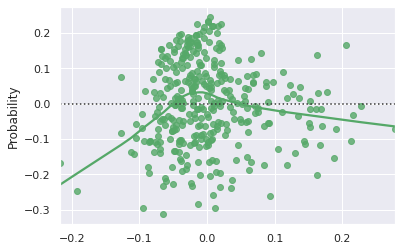

In [ ]:
sns.set(style='darkgrid')
sns.residplot(e1,y_train,lowess=True,color='g')

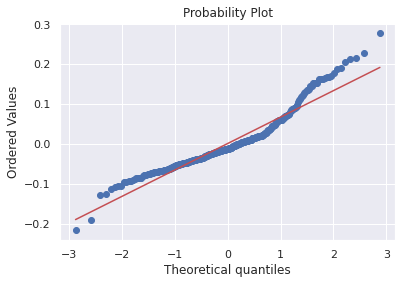

In [ ]:
import scipy.stats as stats
import pylab
stats.probplot(e1,dist='norm',plot=pylab)
pylab.show()

In [ ]:
p1 = model_sm.predict(x_test)
p1[10:15]

241    0.563758
250    0.698780
390    0.587793
289    0.769286
171    0.842745
dtype: float64

In [ ]:
df = pd.DataFrame({'actual_prediction': y_test,
                  'pred_rate': p1,
                   'diff_error':y_test-p1,
                   'sse':pow(y_test-p1,2)})

In [ ]:
df.head()

,actual_prediction,pred_rate,diff_error,sse
90,0.64,0.635641,0.004359,0.000019
254,0.85,0.819898,0.030102,0.000906
283,0.80,0.770183,0.029817,0.000889
445,0.91,0.872031,0.037969,0.001442
461,0.68,0.678621,0.001379,0.000002


In [ ]:
x_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,lor
90,318,106,2,4.0,7.92,1,4.0
254,321,114,4,4.0,9.12,0,5.0
283,321,111,3,2.5,8.90,1,3.0
445,328,116,5,4.5,9.08,1,5.0
461,301,102,3,2.5,8.13,1,2.0


In [ ]:
# Prediction 1 (Actual Value:0.85) OLS model
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(model_sm.predict([[321, 114, 4, 4.0, 9.12, 0, 5.0]])[0]*100, 3)))

Chance of getting into UCLA is 81.99%


In [ ]:
# Prediction 1 (Actual Value:0.85) Linear model
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(model_lr.predict([[321, 114, 4, 4.0, 9.12, 0, 5.0]])[0]*100, 3)))

Chance of getting into UCLA is 83.469%


In [ ]:
# Prediction 2 (Actual Value:0.64) OLS model
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(model_sm.predict([[318, 106, 2, 4.0, 7.92, 1, 4.0]])[0]*100, 3)))

Chance of getting into UCLA is 63.564%


In [ ]:
# Prediction 2 (Actual Value:0.64) Linear model
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(model_lr.predict([[318, 106, 2, 4.0, 7.92, 1, 4.0]])[0]*100, 3)))

Chance of getting into UCLA is 65.467%


In [ ]:
# Prediction 3 (Actual value: .68) OLS model
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(model_sm.predict([[301, 102, 3, 2.5, 8.13, 1, 4.0]])[0]*100, 3)))

Chance of getting into UCLA is 71.287%


In [ ]:
# Prediction 3 (Actual value: .68) Linear model
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(model_lr.predict([[301, 102, 3, 2.5, 8.13, 1, 4.0]])[0]*100, 3)))

Chance of getting into UCLA is 64.012%


In [ ]:
# Prediction 4 (Actual value: .75) OLS model
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(model_sm.predict([[321, 109, 3, 3.0, 8.2, 1, 4.0]])[0]*100, 3)))

Chance of getting into UCLA is 68.551%


In [ ]:
# Prediction 4 (Actual value: .75) Linear model
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(model_lr.predict([[321, 109, 3, 3.0, 8.2, 1, 4.0]])[0]*100, 3)))

Chance of getting into UCLA is 70.863%


# *# After evaluating both model results with actual data Linear and OLS both working almost same accuracy but I prefer Linear model.*